# Plots with ZFOURGE CDFS Data

In [2]:
import warnings

import numpy as np
import pandas as pd
from matplotlib import gridspec
import matplotlib.pyplot as plt

from utils import white_viridis, scatter_colour_density

warnings.filterwarnings(category=RuntimeWarning, action='ignore', message='All-NaN slice encountered')

In [3]:
# Read in CDFS main data
data = pd.read_csv('DATA/ZFOURGE/CDFS/CDFS_MAIN.csv')
df = pd.DataFrame(data)
df = df[df['Use'] == 1]

In [4]:
# Font settings
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Cambria']
plt.rcParams['mathtext.fontset'] = 'custom'
plt.rcParams['mathtext.rm'] = 'Cambria'
plt.rcParams['mathtext.it'] = 'Cambria:italic'
plt.rcParams['mathtext.bf'] = 'Cambria:bold'
plt.rcParams['axes.formatter.use_mathtext'] = True
# plt.rcParams['text.usetex'] = True

# SFR vs Mass

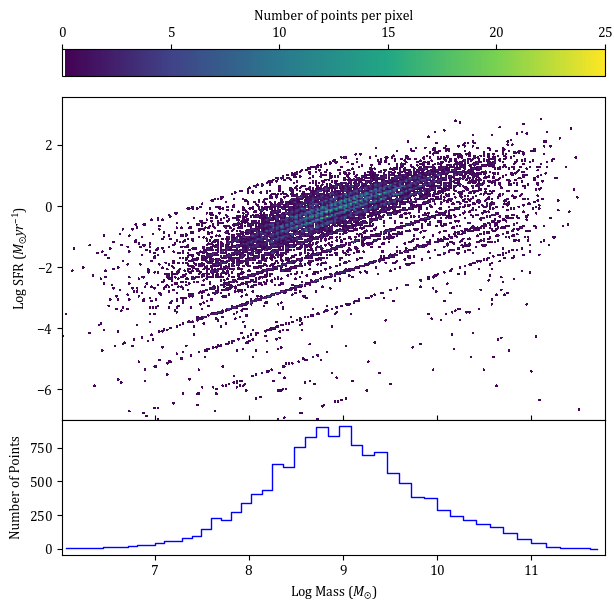

In [9]:
mass = df['lmass']
sfr = df['lsfr']

# Define bins for the bar graph
x_bins = np.logspace(np.log10(min(mass)), np.log10(max(mass)), 50)
counts, _ = np.histogram(mass, bins=x_bins)
x_centers = np.sqrt(x_bins[:-1] * x_bins[1:])

# Create a grid layout with 2 rows and 1 column
fig = plt.figure(figsize=(7, 7))
gs = gridspec.GridSpec(2, 1, height_ratios=[3, 1])
gs.update(hspace=0.0)  # Set the vertical gap between subplots to 0

# Log-log Scatter plot
ax0 = plt.subplot(gs[0], projection='scatter_density')
density = ax0.scatter_density(mass, sfr, cmap=white_viridis)
plt.colorbar(density, label='Number of points per pixel', location='top')
ax0.set_ylabel('Log SFR ($M_{☉} yr^{-1}$)')
ax0.set_ylim(-7) # xlim is never less than 6

# Bar graph
ax1 = plt.subplot(gs[1], sharex=ax0)
ax1.step(x_centers, counts, where='mid', color='b', linewidth=1)
ax1.set_xlabel('Log Mass ($M_{☉}$)')
ax1.set_ylabel('Number of Points')
ax1.get_xaxis().set_ticks_position('both')

# Mass vs Redshift

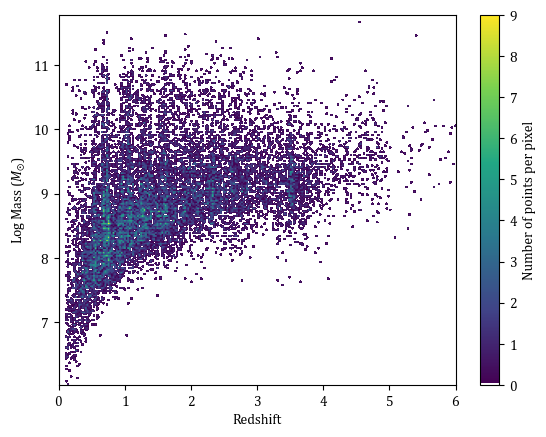

In [41]:
mass = df['lmass']
z = df['zpk']

fig = plt.figure()
scatter_colour_density(fig, z, mass, white_viridis)
plt.xlabel('Redshift')
plt.ylabel('Log Mass ($M_{☉}$)')
plt.xlim(0, 6)
plt.show()

# Ks vs Redshift

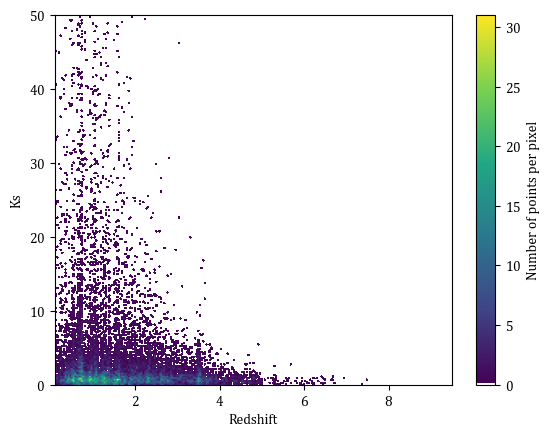

In [50]:
ks = df['FKs']
z = df['zpk']

fig = plt.figure()
scatter_colour_density(fig, z, ks, white_viridis)
plt.xlabel('Redshift')
plt.ylabel('Ks')
plt.ylim(0, 50)
plt.show()

# U-V vs Mass

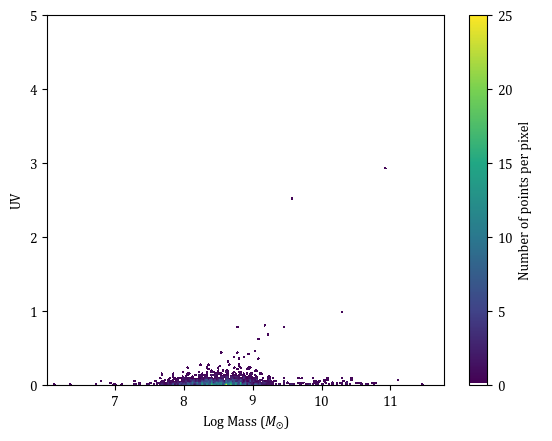

In [60]:
# uv = df['L2800']
U = df['FU']
V = df['FV']
mass = df['lmass']

fig = plt.figure()
scatter_colour_density(fig, mass, U-V, white_viridis)
plt.xlabel('Log Mass ($M_{☉}$)')
plt.ylabel('UV')
plt.ylim(0, 5)
plt.show()

# U-V vs V-J

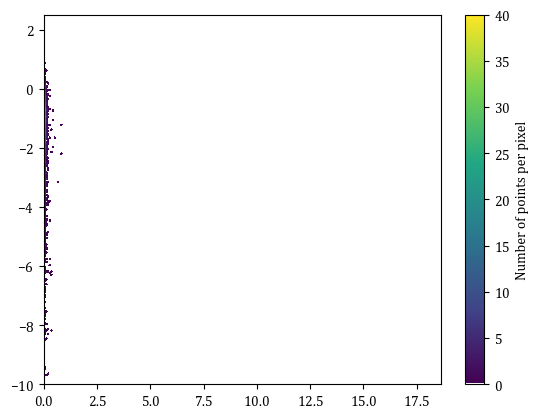

In [63]:
U = df['FU']
V = df['FV']
J1 = df['FJ1']
J2 = df['FJ2']
J3 = df['FJ3']

fig = plt.figure()
scatter_colour_density(fig, U-V, V-(J1+J2+J3), white_viridis)
plt.xlim(0)
plt.ylim(-10)
plt.show()